In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
train = pd.read_csv('train.csv')
org = pd.read_csv('ConcreteStrengthData.csv')
train = pd.concat([train, org])

test = pd.read_csv('test.csv')
ids = test['id']
df = pd.concat([train, test])

In [30]:
df['CementComponent'] = df['CementComponent'].fillna(df['CementComponent '])

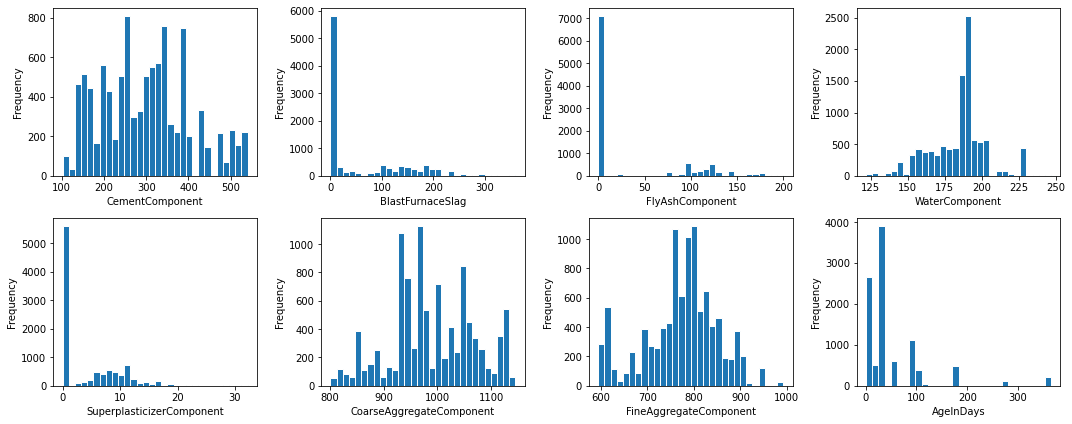

In [40]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))
axes = axes.flatten()
    
for j, col in enumerate(df.columns[:-1]):
    
    df[col].plot.hist(ax = axes[j], bins = 30, edgecolor='white')
    axes[j].set_xlabel(col)
    
plt.tight_layout()

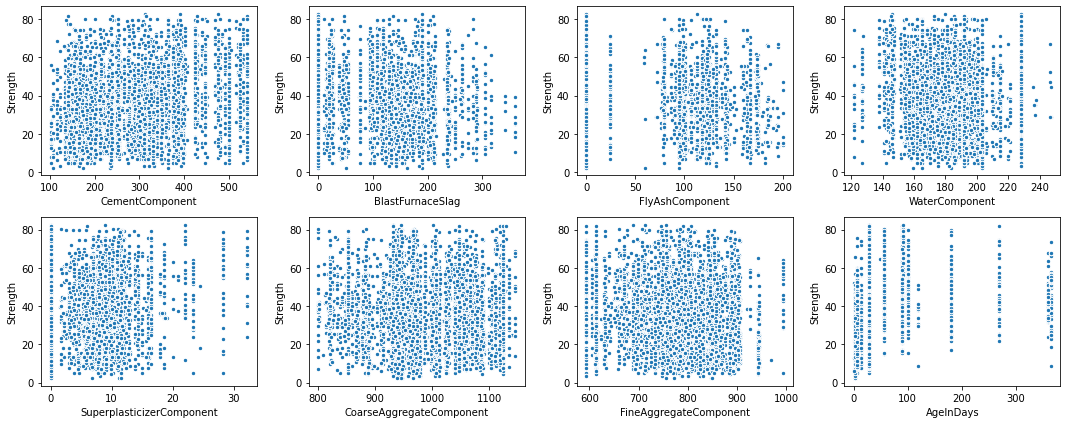

In [41]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))
axes = axes.flatten()
    
for j, col in enumerate(df.columns[:-1]):
    
    df.plot.scatter(x=col, y='Strength', ax = axes[j], edgecolor='white')
    axes[j].set_xlabel(col)
    
plt.tight_layout()

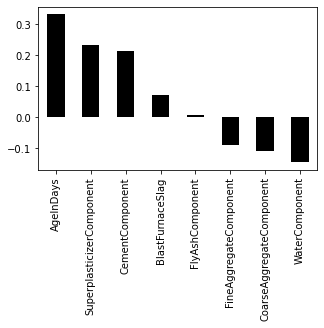

In [43]:
df.corr()['Strength'].sort_values(ascending=False)[1:].plot.bar(figsize=(5,3), cmap='copper')
plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df.drop(columns='Strength')
y = df['Strength']

features = X.columns.values

Scaler = StandardScaler()
Scaler.fit(X)
X = Scaler.transform(X)

X = pd.DataFrame(X, columns = features)

X_test = X[len(train):]
X = X.iloc[:len(train)]
y = y.iloc[:len(train)]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [45]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)

print("Training score: ", model.score(X_train, y_train))
print("Validation score: ", model.score(X_valid, y_valid))

Training score:  0.2534915179636609
Validation score:  0.24377271093278996


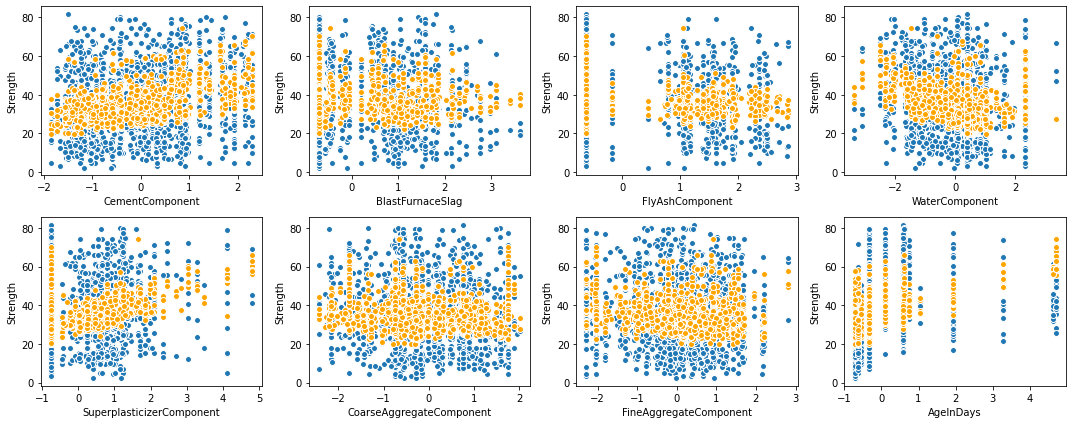

In [48]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))
axes = axes.flatten()
for j, col in enumerate(df.columns[:-1]):
    axes[j].scatter(X_valid[col], y_valid, edgecolor='white')
    axes[j].scatter(X_valid[col], model.predict(X_valid), edgecolor='white', color='orange')
    axes[j].set_xlabel(col)
    axes[j].set_ylabel("Strength")
    
plt.tight_layout()

In [49]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

print("Training score: ", model.score(X_train, y_train))
print("Validation score: ", model.score(X_valid, y_valid))

Training score:  0.7419790629105936
Validation score:  0.40634529187061175


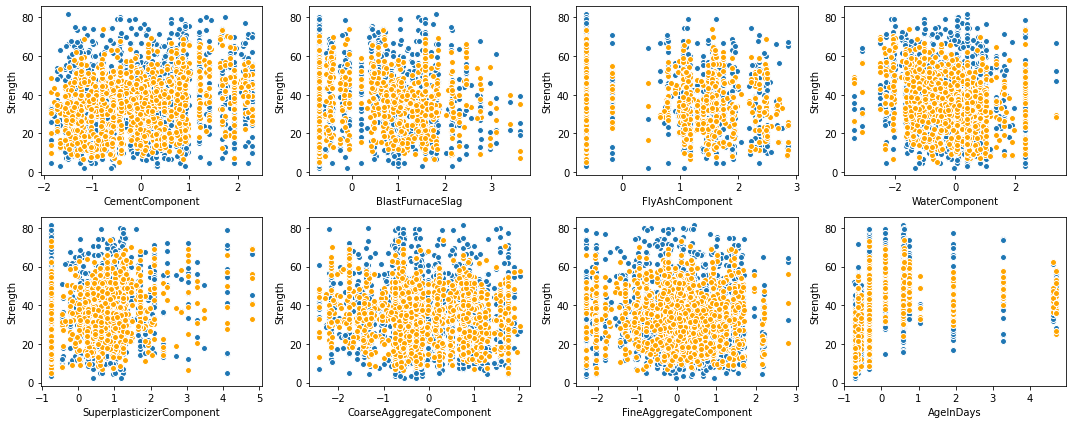

In [51]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))
axes = axes.flatten()
for j, col in enumerate(df.columns[:-1]):
    axes[j].scatter(X_valid[col], y_valid, edgecolor='white')
    axes[j].scatter(X_valid[col], model.predict(X_valid), edgecolor='white', color='orange')
    axes[j].set_xlabel(col)
    axes[j].set_ylabel("Strength")
    
plt.tight_layout()

In [52]:
final_model = XGBRegressor()
model.fit(X, y)
print("Training score: ", model.score(X, y))
y_test_pred = model.predict(X_test)

Training score:  0.7118437040767926


In [53]:
output = pd.DataFrame({'id': ids, 'Strength': y_test_pred})

In [54]:
output.to_csv("Submission.csv", index=False)